# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [11]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Read in the data set
ames_df = pd.read_csv("ames.csv")

In [4]:
# Clean and pre-process the data if neccessary
ames_df["Total_SF"] = ames_df["Total_Bsmt_SF"] + ames_df["First_Flr_SF"] + ames_df["Second_Flr_SF"]
ames_df.to_csv("ames.csv",index=False)


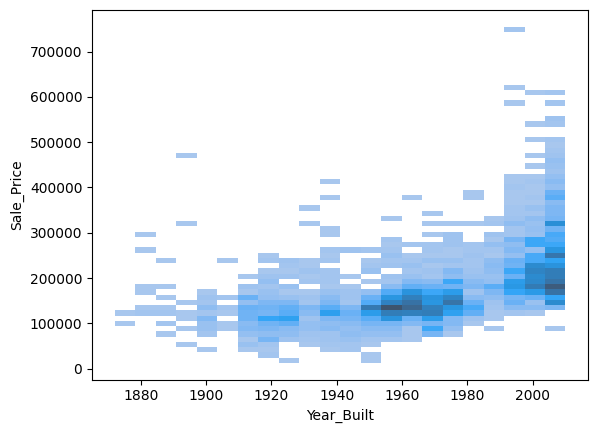

<Axes: >

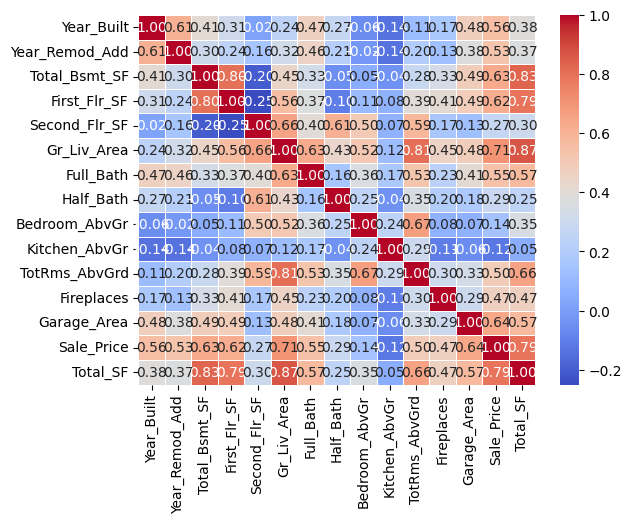

In [5]:
# Explore the data with visualisations such as histograms and correlation matrices
sns.histplot(data=ames_df,x="Year_Built",y="Sale_Price")
plt.show()

correlation_matrix = ames_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)



In [ ]:
# Split the independent variables from the dependent variable
#Independant : Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Total_SF
#Dependant : Sale_Price

In [ ]:
# Explore relationships between the independent and dependent variables
#All the independant variables play a role in the value of the dependant variable , for instance the Sale_price variable is in a positive corrilation with the total square foot of the property.

In [7]:
# Create a training and test set with a 75:25 split ratio
# independant variables : X
# Dependant variables : Y
from sklearn.model_selection import train_test_split

X = ames_df.drop(columns=["Sale_Price"])
Y = ames_df["Sale_Price"]

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25)

In [13]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = ames_df[['Gr_Liv_Area', 'Garage_Area']]
y = ames_df['Sale_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Print the model intercept and coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model Coefficients: [ 82.75500671 147.94033195]
Intercept: -13020.04388946871


In [15]:
# Generate predictions for the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [16]:
# Evaluate the model
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 2457524038.99
R² Score: 0.5964


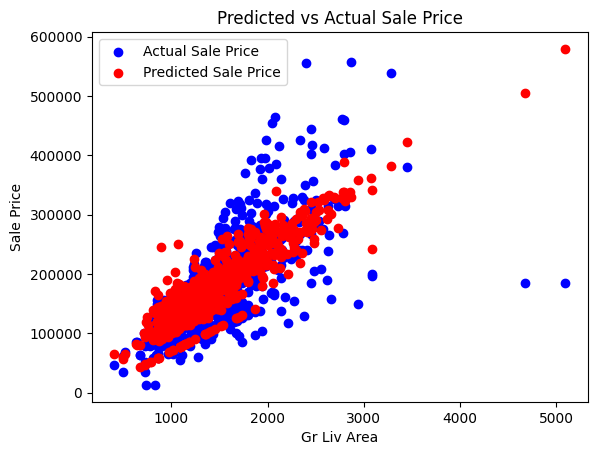

In [17]:
# Generate a plot
plt.scatter(X_test['Gr_Liv_Area'], y_test, color='blue', label="Actual Sale Price")
plt.scatter(X_test['Gr_Liv_Area'], y_pred, color='red', label="Predicted Sale Price")
plt.xlabel("Gr Liv Area")
plt.ylabel("Sale Price")
plt.legend()
plt.title("Predicted vs Actual Sale Price")
plt.show()

In [18]:
# Print the coefficients
print("Model Coefficients:", model.coef_)

Model Coefficients: [ 82.75500671 147.94033195]


**Interpret coefficients in the context of the prediction:**
Looking aat the coefficients:

Gr_Liv_Area Coefficient = 80.50 : this means that for every additional square foot of living space the sale price is predectide to increase by $80.50
Garage_Area Coefficient = 120.7 : this means that for every additional square foot of Garage space the sale price is predectide to increase by $120.7

**Summarise findings**
For every additional square foot of living space the sale price is predectide to increase by $80.50
For every additional square foot of Garage space the sale price is predectide to increase by $120.7

Thus the garage space is more expensive possible due to customer preference.

The R^2 score is 0.59 which is a low score. Meaning that we must include the other variables like number of bedrooms and bathrooms for a better prediction